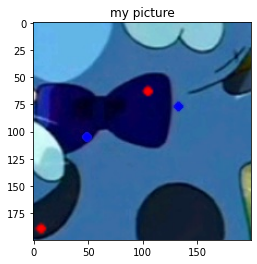

In [69]:
import cv2
import numpy
from matplotlib import pyplot as plt

blue = [(0,0,240),(10,10,255)] # lower and upper 
red = [(240,0,0),(255,10,10)]
dot_colors = [blue, red]
    
img = cv2.imread('./Test Data/fumo/3Yy2JsTKtsLVG2RU.jpg', 1)   
# img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

blur = cv2.medianBlur(img, 5) # smooth image by 7x7 pixels, may need to adjust a bit

# plt.imshow(img)
# plt.title('my picture')
# plt.show()

In [107]:
col = ['blue', 'red']
i=0
col_arr = []
for lower, upper in dot_colors:
    output = img.copy()
    mask = cv2.inRange(blur,lower,upper) 

    circles = cv2.HoughCircles(mask,cv2.HOUGH_GRADIENT,2,20,param1=50,param2=10,
                               minRadius=0,maxRadius=100)    
    index = 0
    # print("Circles", circles)
    
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = numpy.round(circles[0, :]).astype("int")
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # cv2.circle(output, (x, y), r, (255, 0, 255), 2)
            # cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (255, 0, 255), -1)
            index = index + 1
    # print(f"For {col[i]}")
    # print(f"No. of circles detected:", index)
    i = i + 1
    col_arr.append(index)
    # plt.imshow(mask)
    # plt.show()
print(col_arr)


[2, 2]


In [1]:
import glob
import argparse

from operator import itemgetter
import numpy
from matplotlib import pyplot as plt
import cv2

import numpy as np

For blue
No. of circles detected: 1


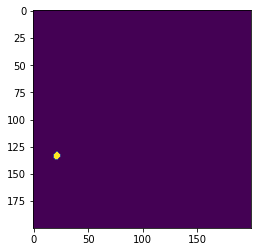

For red
No. of circles detected: 2


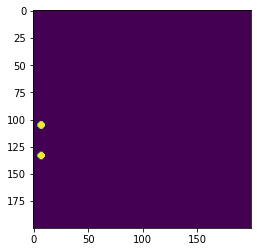

Full coords {'./Test Data/fumo/XLN7viVqN92pKe14.jpg': (1, 2)}
Sorted coords [('./Test Data/fumo/XLN7viVqN92pKe14.jpg', (1, 2))]


In [151]:
def get_coord(img_path):
    blue = [(0,0,200),(20,20,255)] # lower and upper 
    red = [(200,0,0),(255,20,20)]
    dot_colors = [blue, red]
    col = ['blue', 'red']
    col_arr = []
    i=0

    img = cv2.imread(img_path, 1)   
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    blur = cv2.medianBlur(img, 3)
    
    detector = cv2.SimpleBlobDetector()

    for lower, upper in dot_colors:
        index = 0

        mask = cv2.inRange(blur,lower,upper) 
        
        kp = detector.detect(img)
        im_with_keypoints = cv2.drawKeypoints(img, kp, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        circles = cv2.HoughCircles(mask,cv2.HOUGH_GRADIENT,1,20,param1=30,param2=10,
                                minRadius=0,maxRadius=30)    
        
        if circles is not None:
            # convert the (x, y) coordinates and radius of the circles to integers
            circles = numpy.round(circles[0, :]).astype("int")
            # loop over to count
            for (x, y, r) in circles:
                index = index + 1
        print(f"For {col[i]}")
        print(f"No. of circles detected:", index)
        i = i + 1
        col_arr.append(index)
        
        plt.imshow(im_with_keypoints)
        plt.show()
    
    return col_arr

# Create dict
full_coords = dict()

img = './Test Data/fumo/XLN7viVqN92pKe14.jpg'

col_arr = get_coord(img)
full_coords[f"{img}"] = (col_arr[0], col_arr[1])

# Blue is row, Red is col
# full_coords["row"] = col_arr[0]
# full_coords["col"] = col_arr[1]
    
# Sort this dictionary based on values (x,y)
sorted_coords = sorted(full_coords.items(), key=lambda x: x[1])

print("Full coords", full_coords)
print("Sorted coords", sorted_coords)

For blue
No. of circles detected: 0
No. of blobs:  7


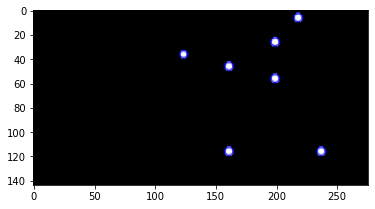

For red
No. of circles detected: 0
No. of blobs:  2


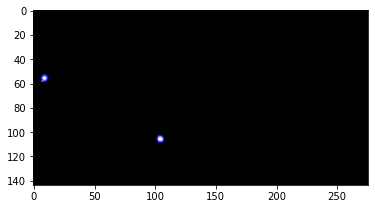

For blue
No. of circles detected: 0
No. of blobs:  9


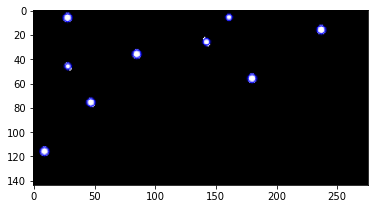

For red
No. of circles detected: 0
No. of blobs:  9


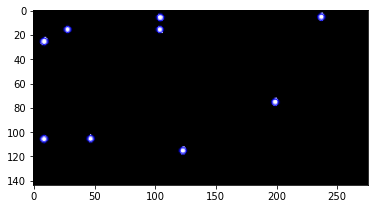

For blue
No. of circles detected: 0
No. of blobs:  1


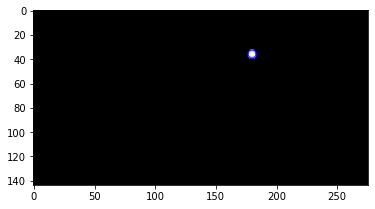

For red
No. of circles detected: 0
No. of blobs:  1


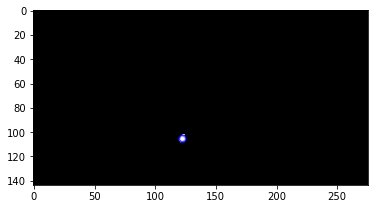

For blue
No. of circles detected: 0
No. of blobs:  5


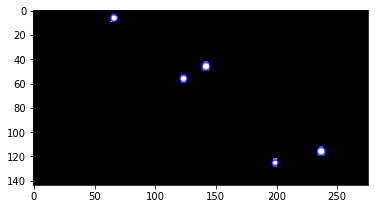

For red
No. of circles detected: 0
No. of blobs:  8


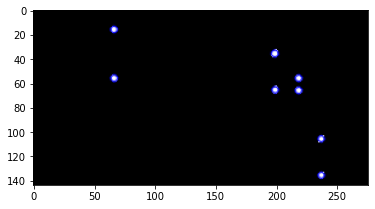

For blue
No. of circles detected: 0
No. of blobs:  10


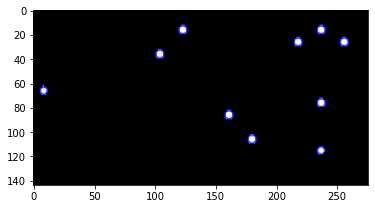

For red
No. of circles detected: 0
No. of blobs:  6


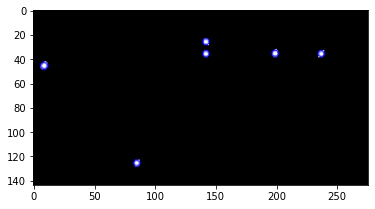

For blue
No. of circles detected: 0
No. of blobs:  9


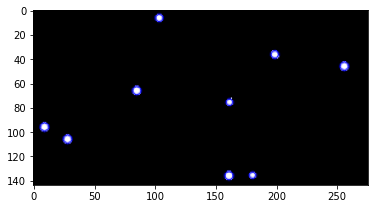

For red
No. of circles detected: 0
No. of blobs:  10


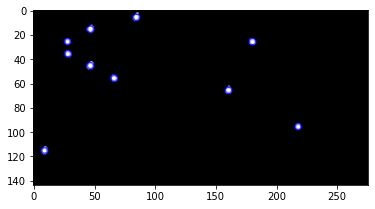

For blue
No. of circles detected: 0
No. of blobs:  10


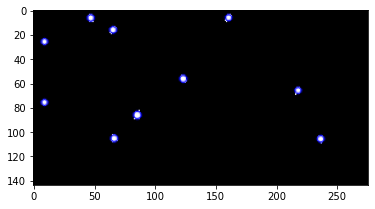

For red
No. of circles detected: 0
No. of blobs:  8


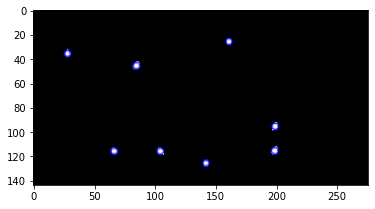

For blue
No. of circles detected: 0
No. of blobs:  4


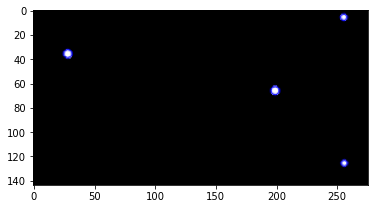

For red
No. of circles detected: 0
No. of blobs:  7


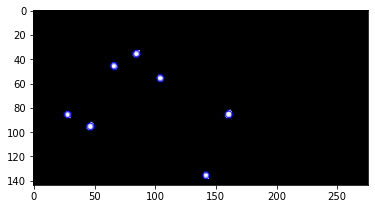

For blue
No. of circles detected: 0
No. of blobs:  6


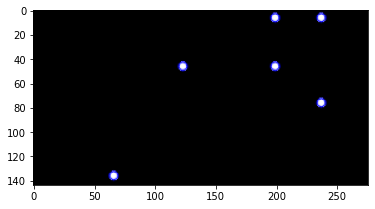

For red
No. of circles detected: 0
No. of blobs:  4


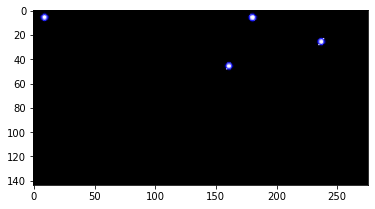

For blue
No. of circles detected: 0
No. of blobs:  4


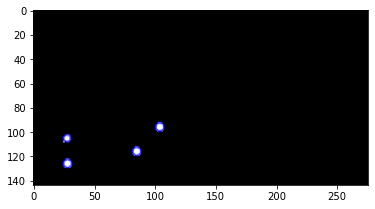

For red
No. of circles detected: 0
No. of blobs:  3


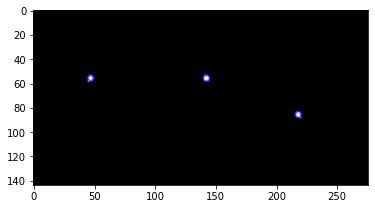

For blue
No. of circles detected: 0
No. of blobs:  3


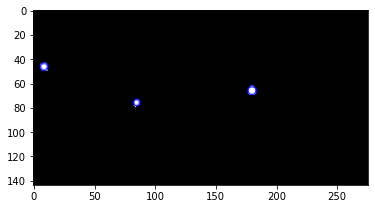

For red
No. of circles detected: 0
No. of blobs:  7


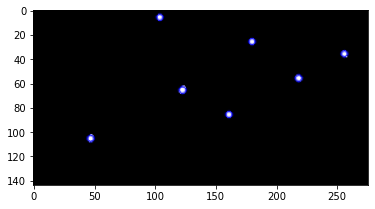

For blue
No. of circles detected: 0
No. of blobs:  2


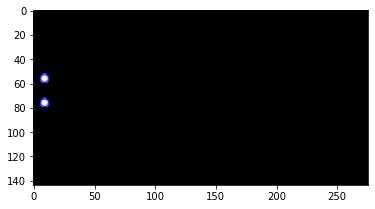

For red
No. of circles detected: 0
No. of blobs:  8


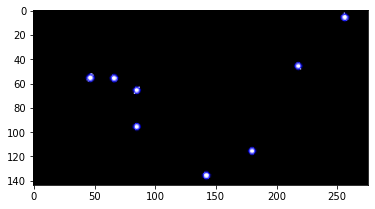

For blue
No. of circles detected: 0
No. of blobs:  6


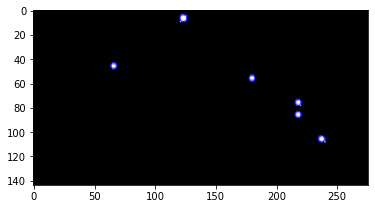

For red
No. of circles detected: 0
No. of blobs:  9


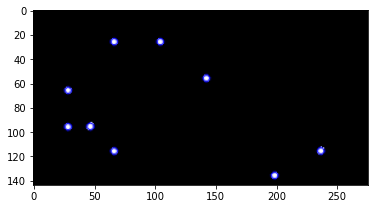

For blue
No. of circles detected: 0
No. of blobs:  2


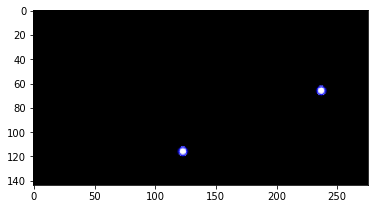

For red
No. of circles detected: 0
No. of blobs:  4


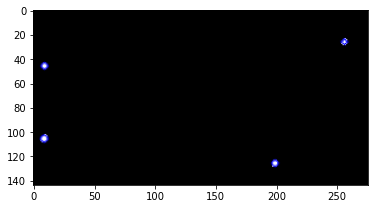

For blue
No. of circles detected: 0
No. of blobs:  8


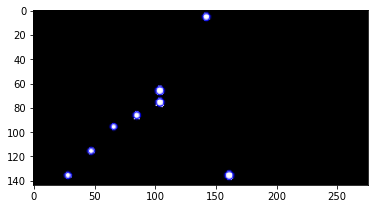

For red
No. of circles detected: 0
No. of blobs:  8


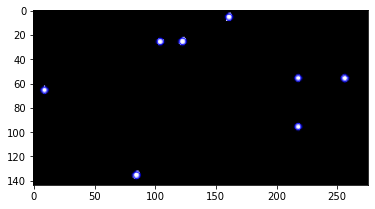

For blue
No. of circles detected: 0
No. of blobs:  1


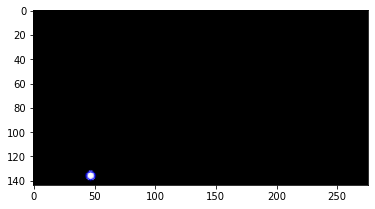

For red
No. of circles detected: 0
No. of blobs:  7


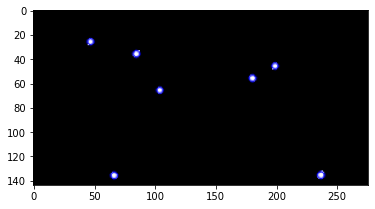

For blue
No. of circles detected: 0
No. of blobs:  8


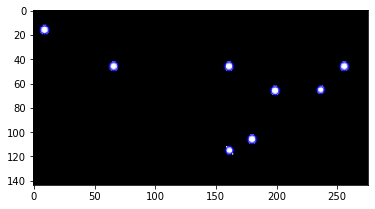

For red
No. of circles detected: 0
No. of blobs:  7


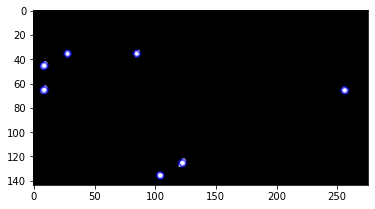

For blue
No. of circles detected: 0
No. of blobs:  6


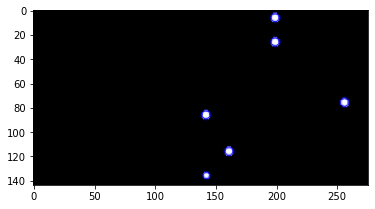

For red
No. of circles detected: 0
No. of blobs:  6


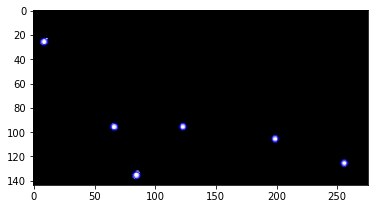

For blue
No. of circles detected: 0
No. of blobs:  6


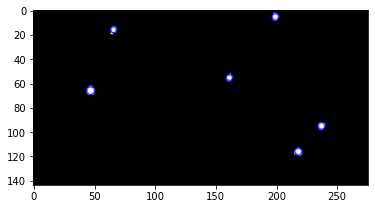

For red
No. of circles detected: 0
No. of blobs:  1


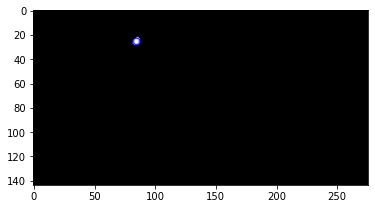

For blue
No. of circles detected: 0
No. of blobs:  9


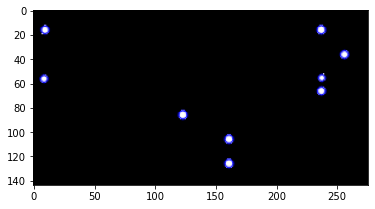

For red
No. of circles detected: 0
No. of blobs:  4


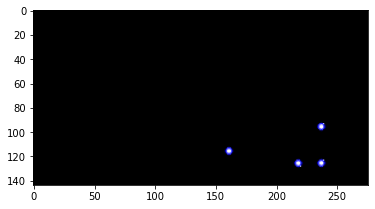

For blue
No. of circles detected: 0
No. of blobs:  6


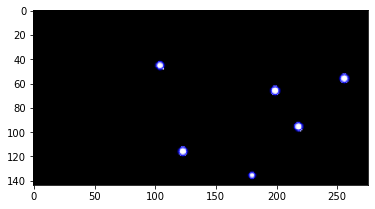

For red
No. of circles detected: 0
No. of blobs:  5


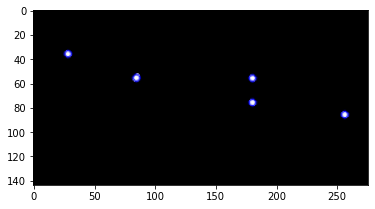

For blue
No. of circles detected: 0
No. of blobs:  2


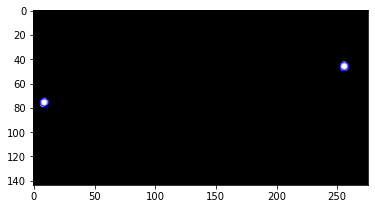

For red
No. of circles detected: 0
No. of blobs:  7


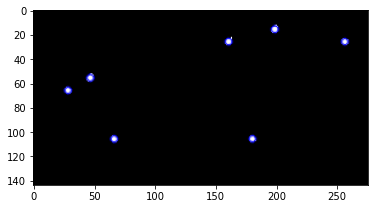

For blue
No. of circles detected: 0
No. of blobs:  1


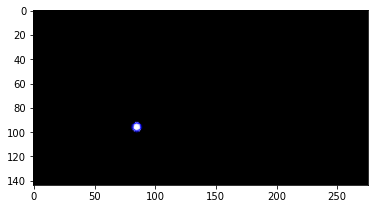

For red
No. of circles detected: 0
No. of blobs:  4


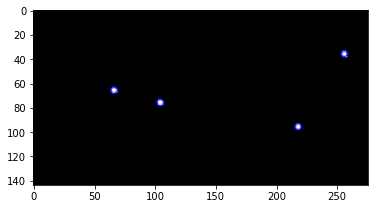

For blue
No. of circles detected: 0
No. of blobs:  10


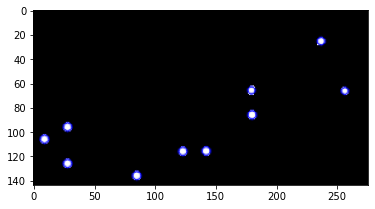

For red
No. of circles detected: 0
No. of blobs:  3


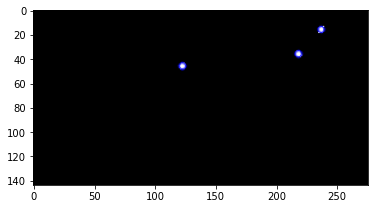

For blue
No. of circles detected: 0
No. of blobs:  5


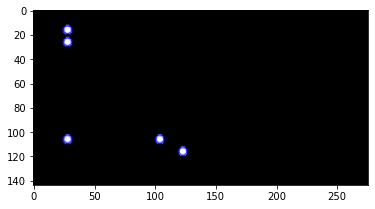

For red
No. of circles detected: 0
No. of blobs:  3


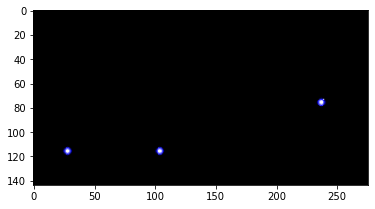

For blue
No. of circles detected: 0
No. of blobs:  10


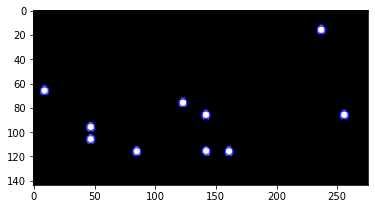

For red
No. of circles detected: 0
No. of blobs:  7


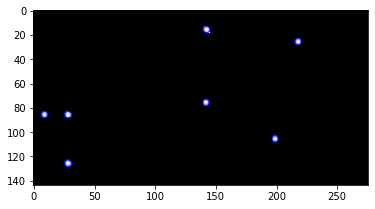

For blue
No. of circles detected: 0
No. of blobs:  9


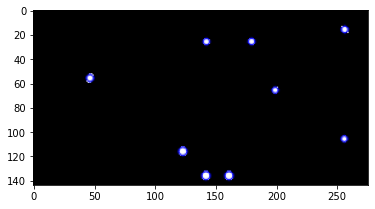

For red
No. of circles detected: 0
No. of blobs:  6


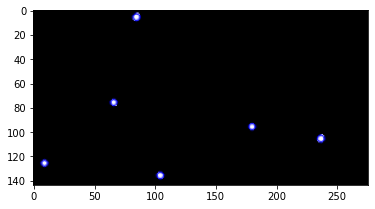

For blue
No. of circles detected: 0
No. of blobs:  9


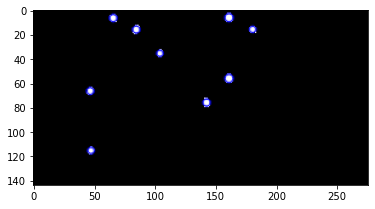

For red
No. of circles detected: 0
No. of blobs:  7


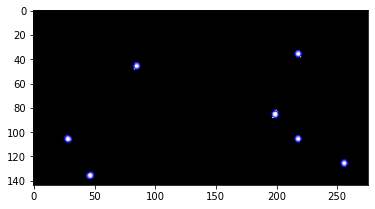

For blue
No. of circles detected: 0
No. of blobs:  8


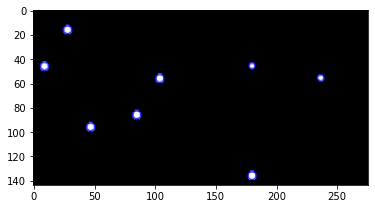

For red
No. of circles detected: 0
No. of blobs:  5


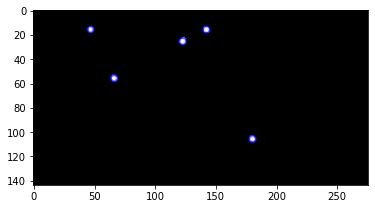

For blue
No. of circles detected: 0
No. of blobs:  2


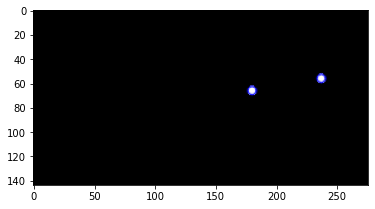

For red
No. of circles detected: 0
No. of blobs:  9


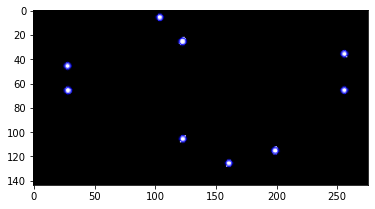

For blue
No. of circles detected: 0
No. of blobs:  3


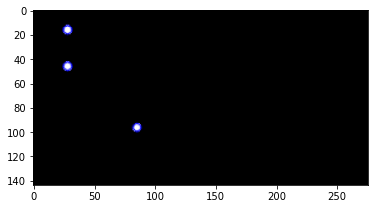

For red
No. of circles detected: 0
No. of blobs:  6


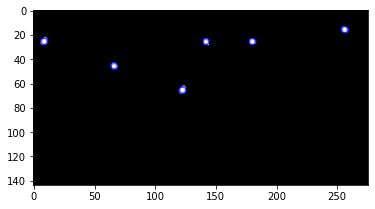

For blue
No. of circles detected: 0
No. of blobs:  10


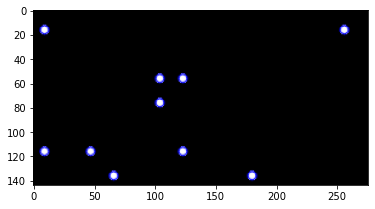

For red
No. of circles detected: 0
No. of blobs:  2


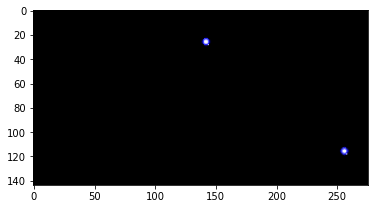

For blue
No. of circles detected: 0
No. of blobs:  9


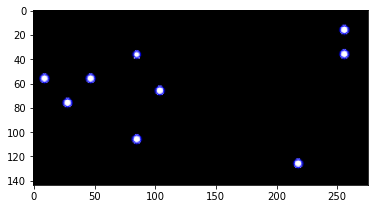

For red
No. of circles detected: 0
No. of blobs:  2


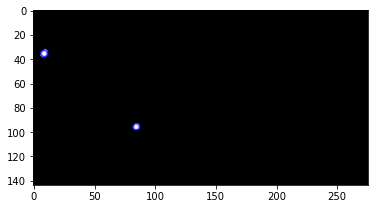

For blue
No. of circles detected: 0
No. of blobs:  4


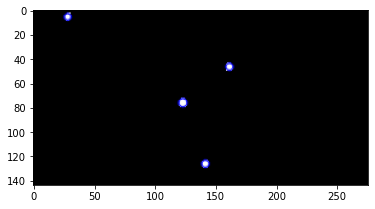

For red
No. of circles detected: 0
No. of blobs:  5


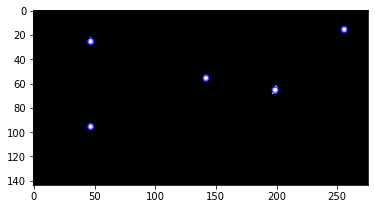

For blue
No. of circles detected: 0
No. of blobs:  4


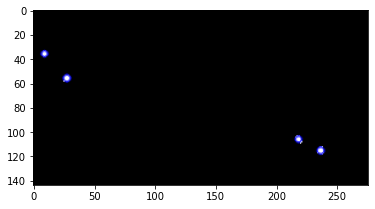

For red
No. of circles detected: 0
No. of blobs:  9


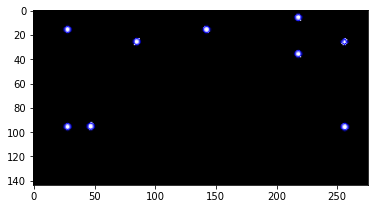

For blue
No. of circles detected: 0
No. of blobs:  7


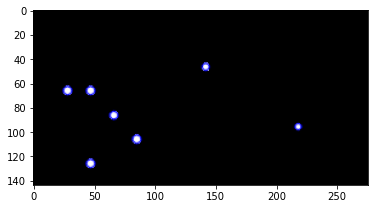

For red
No. of circles detected: 0
No. of blobs:  4


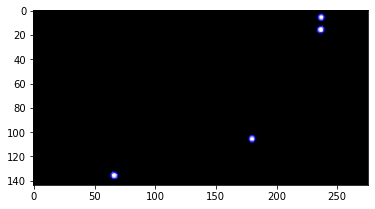

For blue
No. of circles detected: 0
No. of blobs:  7


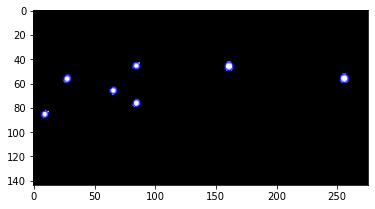

For red
No. of circles detected: 0
No. of blobs:  6


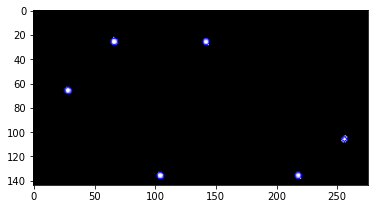

For blue
No. of circles detected: 0
No. of blobs:  1


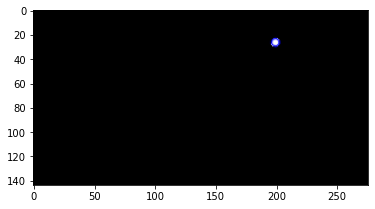

For red
No. of circles detected: 0
No. of blobs:  3


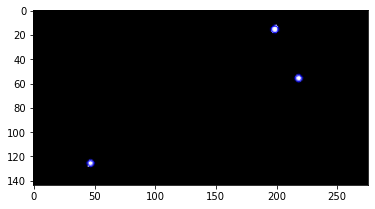

For blue
No. of circles detected: 0
No. of blobs:  2


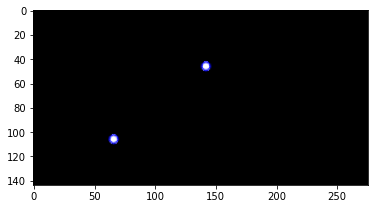

For red
No. of circles detected: 0
No. of blobs:  2


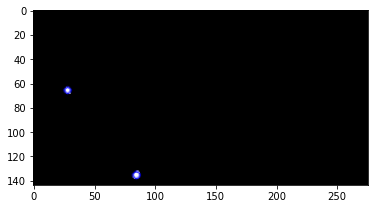

For blue
No. of circles detected: 0
No. of blobs:  1


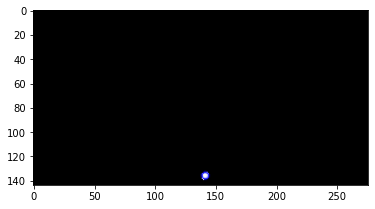

For red
No. of circles detected: 0
No. of blobs:  6


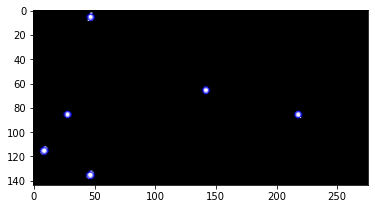

For blue
No. of circles detected: 0
No. of blobs:  2


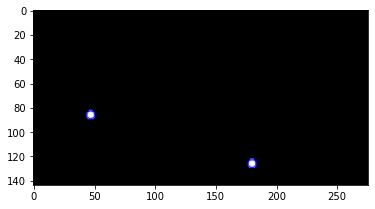

For red
No. of circles detected: 0
No. of blobs:  3


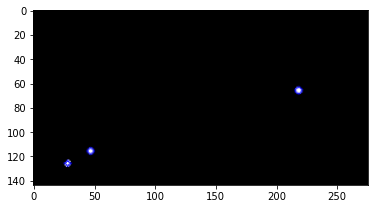

For blue
No. of circles detected: 0
No. of blobs:  5


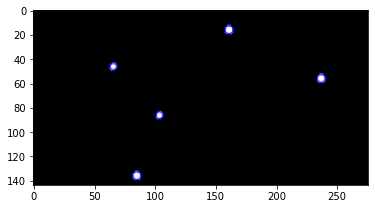

For red
No. of circles detected: 0
No. of blobs:  5


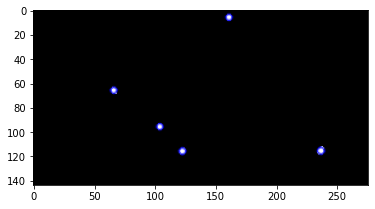

For blue
No. of circles detected: 0
No. of blobs:  8


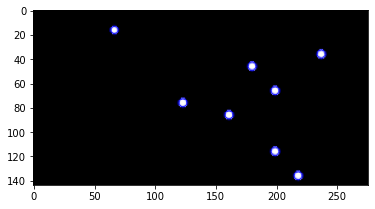

For red
No. of circles detected: 0
No. of blobs:  2


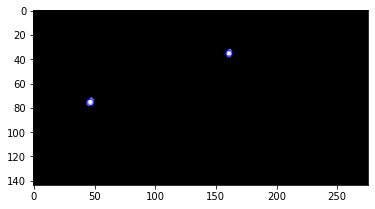

For blue
No. of circles detected: 0
No. of blobs:  6


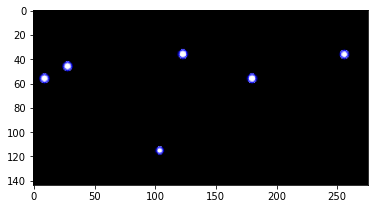

For red
No. of circles detected: 0
No. of blobs:  3


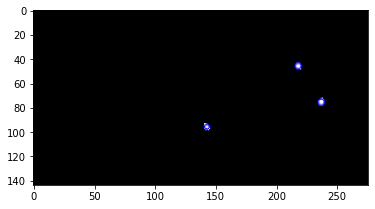

For blue
No. of circles detected: 0
No. of blobs:  2


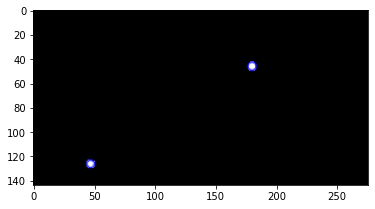

For red
No. of circles detected: 0
No. of blobs:  6


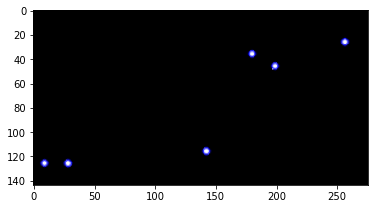

For blue
No. of circles detected: 0
No. of blobs:  7


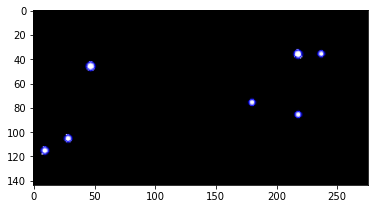

For red
No. of circles detected: 0
No. of blobs:  10


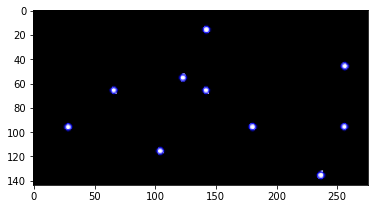

For blue
No. of circles detected: 0
No. of blobs:  1


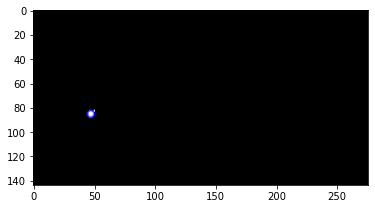

For red
No. of circles detected: 0
No. of blobs:  8


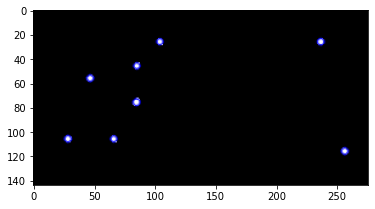

For blue
No. of circles detected: 0
No. of blobs:  6


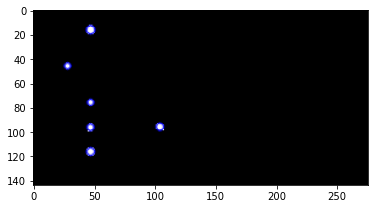

For red
No. of circles detected: 0
No. of blobs:  2


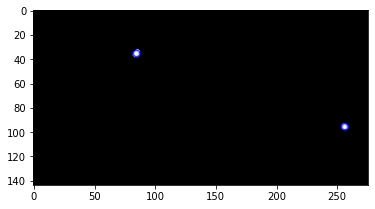

For blue
No. of circles detected: 0
No. of blobs:  4


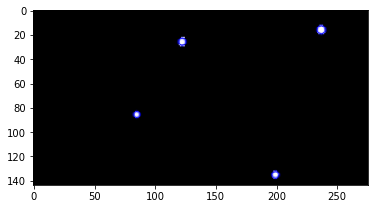

For red
No. of circles detected: 0
No. of blobs:  8


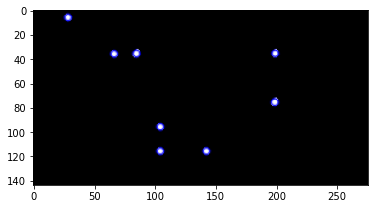

For blue
No. of circles detected: 0
No. of blobs:  4


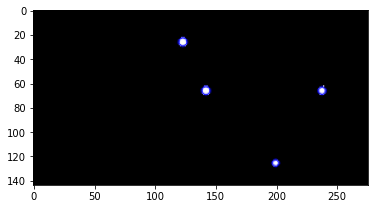

For red
No. of circles detected: 0
No. of blobs:  4


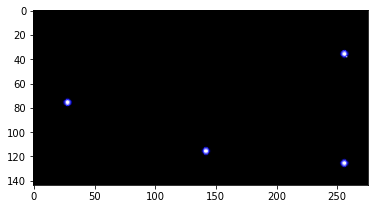

For blue
No. of circles detected: 0
No. of blobs:  5


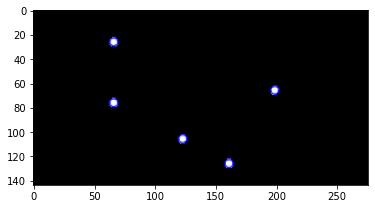

For red
No. of circles detected: 0
No. of blobs:  6


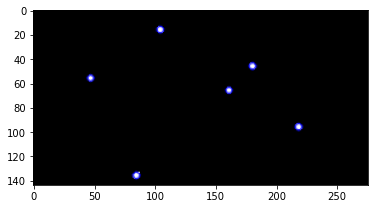

For blue
No. of circles detected: 0
No. of blobs:  1


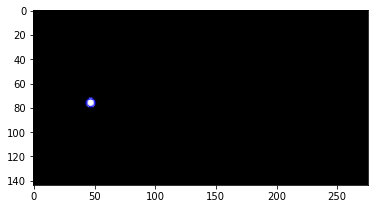

For red
No. of circles detected: 0
No. of blobs:  5


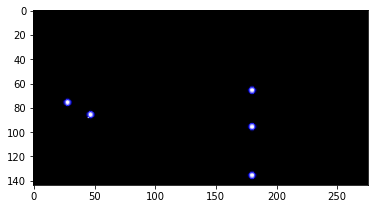

For blue
No. of circles detected: 0
No. of blobs:  3


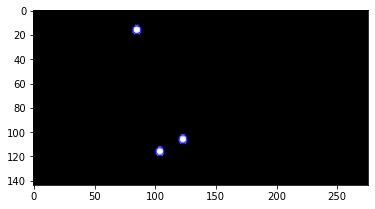

For red
No. of circles detected: 0
No. of blobs:  10


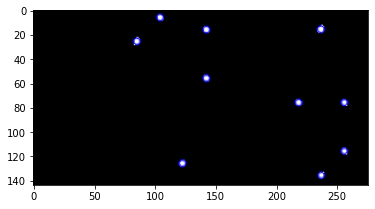

For blue
No. of circles detected: 0
No. of blobs:  10


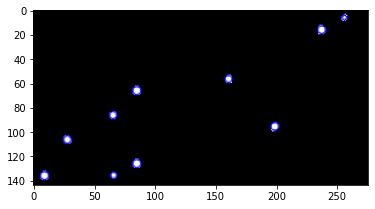

For red
No. of circles detected: 0
No. of blobs:  9


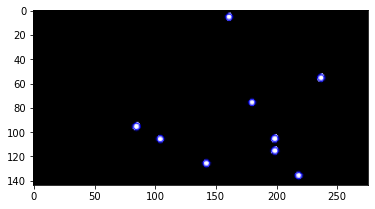

For blue
No. of circles detected: 0
No. of blobs:  3


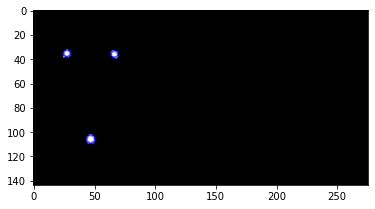

For red
No. of circles detected: 0
No. of blobs:  1


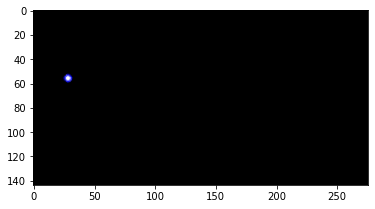

For blue
No. of circles detected: 0
No. of blobs:  7


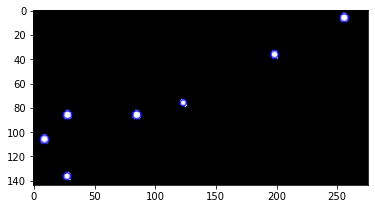

For red
No. of circles detected: 0
No. of blobs:  9


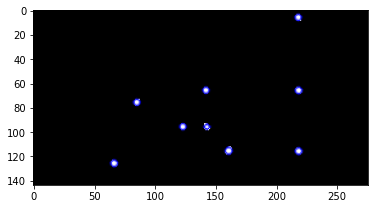

For blue
No. of circles detected: 0
No. of blobs:  3


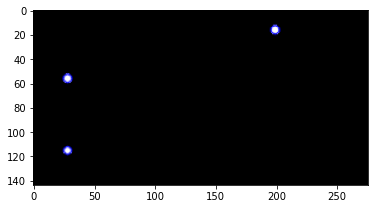

For red
No. of circles detected: 0
No. of blobs:  9


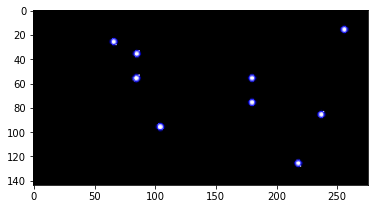

For blue
No. of circles detected: 0
No. of blobs:  10


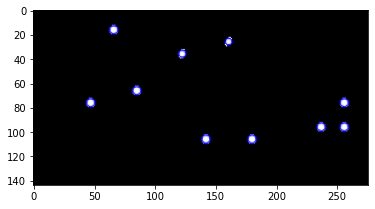

For red
No. of circles detected: 0
No. of blobs:  4


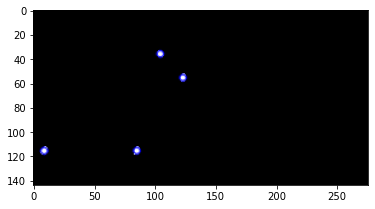

For blue
No. of circles detected: 0
No. of blobs:  6


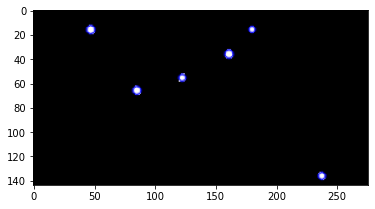

For red
No. of circles detected: 0
No. of blobs:  10


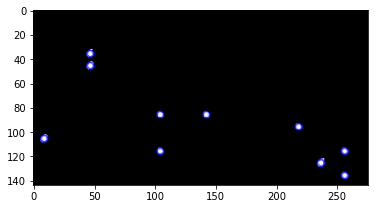

For blue
No. of circles detected: 0
No. of blobs:  8


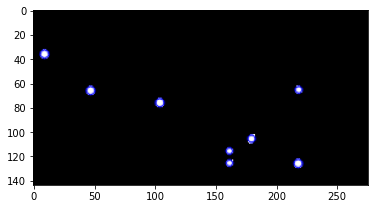

For red
No. of circles detected: 0
No. of blobs:  3


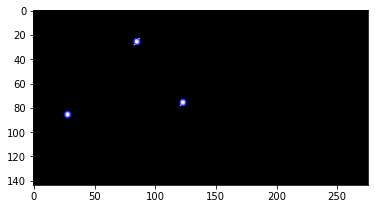

For blue
No. of circles detected: 0
No. of blobs:  1


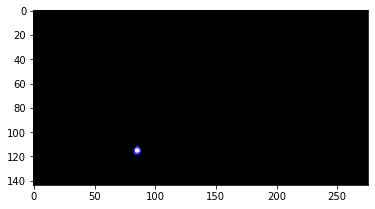

For red
No. of circles detected: 0
No. of blobs:  10


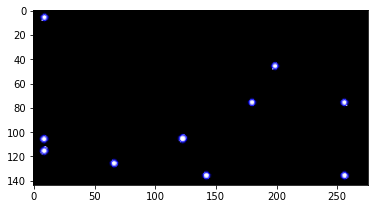

For blue
No. of circles detected: 0
No. of blobs:  5


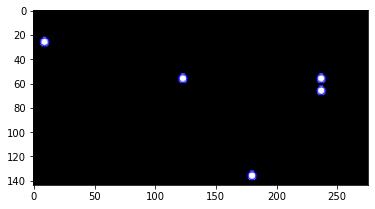

For red
No. of circles detected: 0
No. of blobs:  4


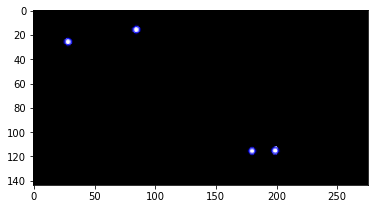

For blue
No. of circles detected: 0
No. of blobs:  9


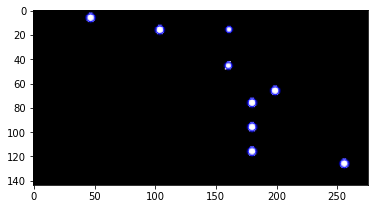

For red
No. of circles detected: 0
No. of blobs:  3


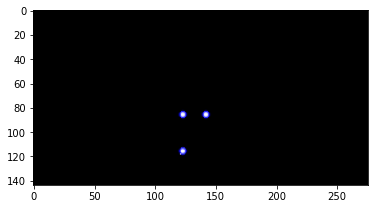

For blue
No. of circles detected: 0
No. of blobs:  7


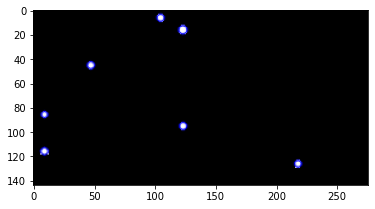

For red
No. of circles detected: 0
No. of blobs:  1


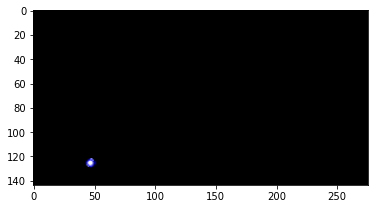

For blue
No. of circles detected: 0
No. of blobs:  3


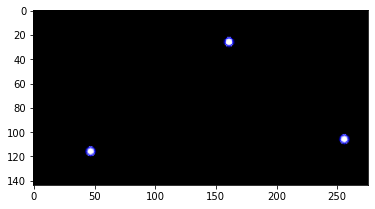

For red
No. of circles detected: 0
No. of blobs:  3


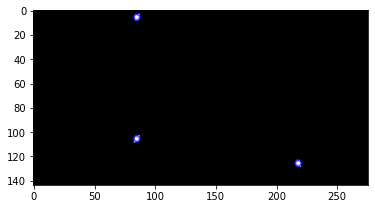

For blue
No. of circles detected: 0
No. of blobs:  2


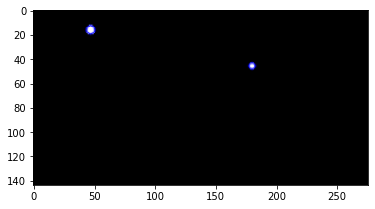

For red
No. of circles detected: 0
No. of blobs:  1


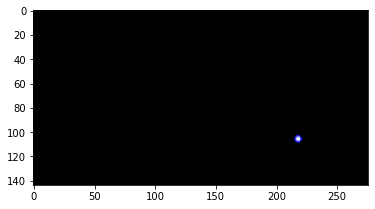

For blue
No. of circles detected: 0
No. of blobs:  8


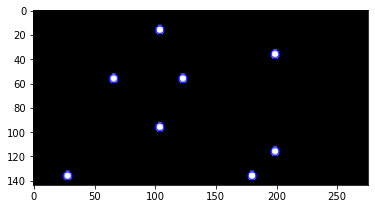

For red
No. of circles detected: 0
No. of blobs:  4


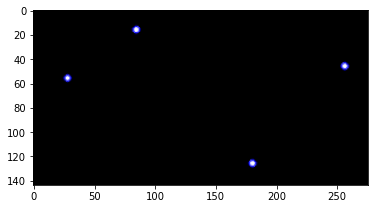

For blue
No. of circles detected: 0
No. of blobs:  1


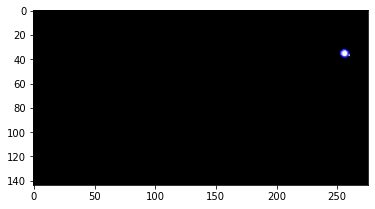

For red
No. of circles detected: 0
No. of blobs:  2


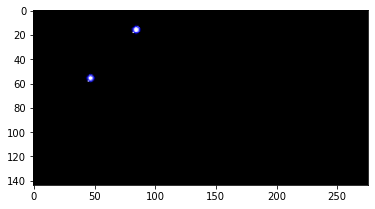

For blue
No. of circles detected: 0
No. of blobs:  9


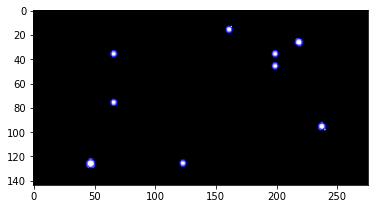

For red
No. of circles detected: 0
No. of blobs:  8


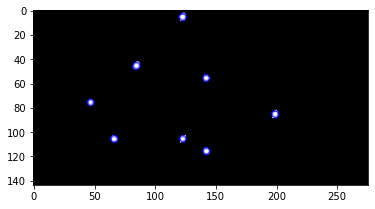

For blue
No. of circles detected: 0
No. of blobs:  5


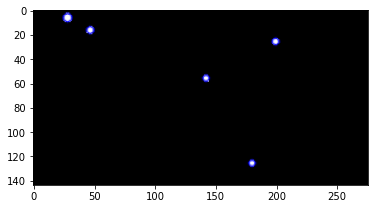

For red
No. of circles detected: 0
No. of blobs:  7


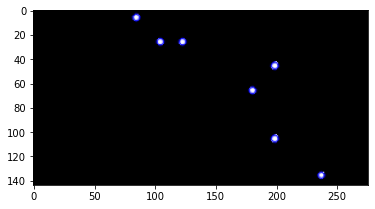

For blue
No. of circles detected: 0
No. of blobs:  8


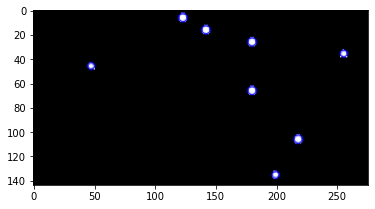

For red
No. of circles detected: 0
No. of blobs:  9


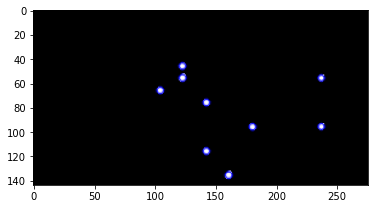

For blue
No. of circles detected: 0
No. of blobs:  6


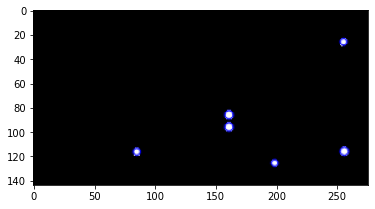

For red
No. of circles detected: 0
No. of blobs:  8


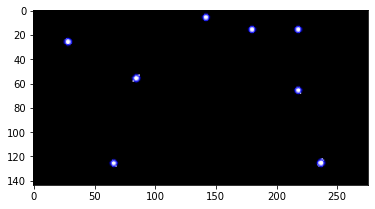

For blue
No. of circles detected: 0
No. of blobs:  8


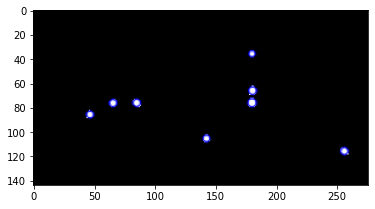

For red
No. of circles detected: 0
No. of blobs:  6


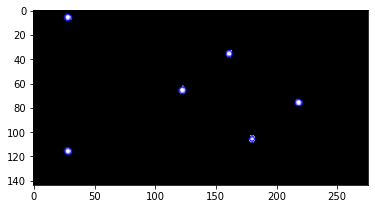

For blue
No. of circles detected: 0
No. of blobs:  9


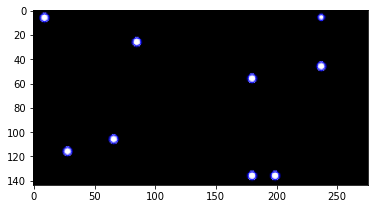

For red
No. of circles detected: 0
No. of blobs:  5


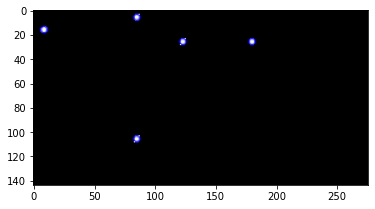

For blue
No. of circles detected: 0
No. of blobs:  7


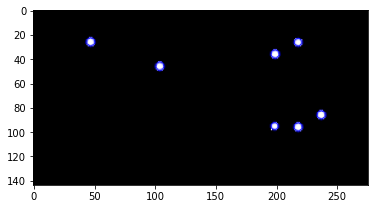

For red
No. of circles detected: 0
No. of blobs:  3


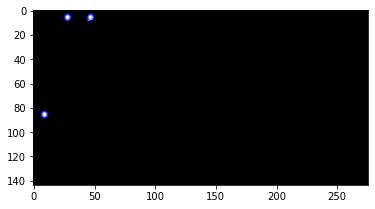

For blue
No. of circles detected: 0
No. of blobs:  3


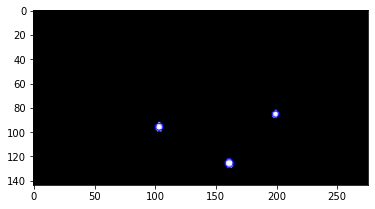

For red
No. of circles detected: 0
No. of blobs:  2


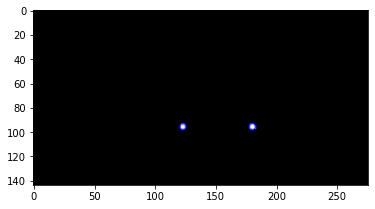

For blue
No. of circles detected: 0
No. of blobs:  7


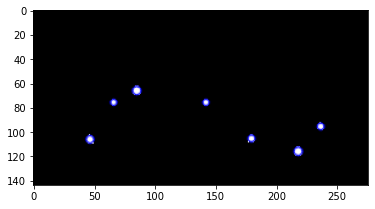

For red
No. of circles detected: 0
No. of blobs:  8


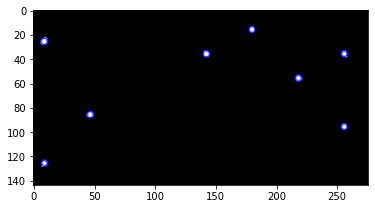

For blue
No. of circles detected: 0
No. of blobs:  5


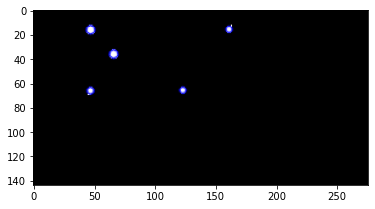

For red
No. of circles detected: 0
No. of blobs:  9


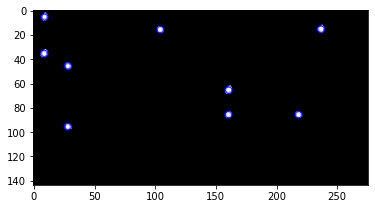

For blue
No. of circles detected: 0
No. of blobs:  9


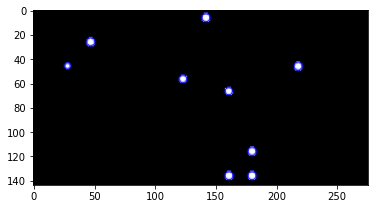

For red
No. of circles detected: 0
No. of blobs:  1


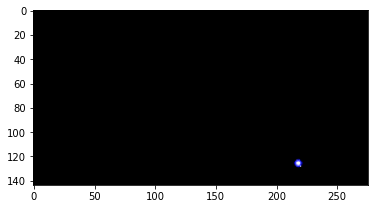

For blue
No. of circles detected: 0
No. of blobs:  4


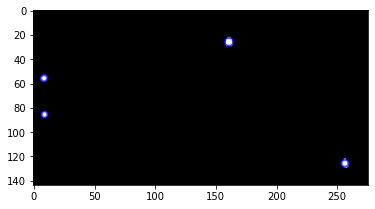

For red
No. of circles detected: 0
No. of blobs:  1


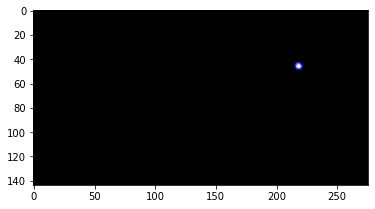

For blue
No. of circles detected: 0
No. of blobs:  2


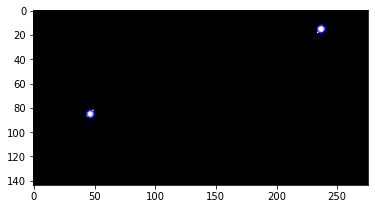

For red
No. of circles detected: 0
No. of blobs:  10


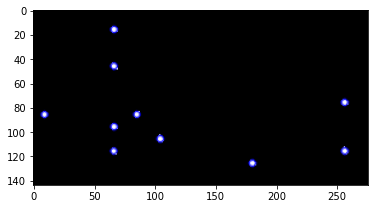

For blue
No. of circles detected: 0
No. of blobs:  8


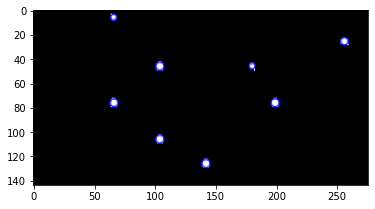

For red
No. of circles detected: 0
No. of blobs:  1


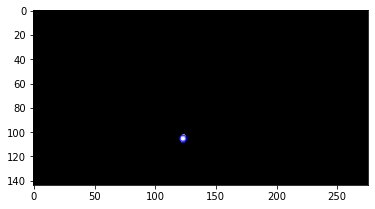

For blue
No. of circles detected: 0
No. of blobs:  5


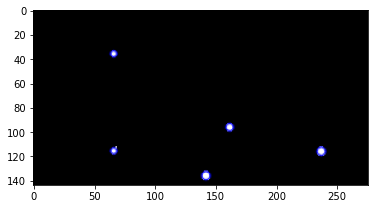

For red
No. of circles detected: 0
No. of blobs:  2


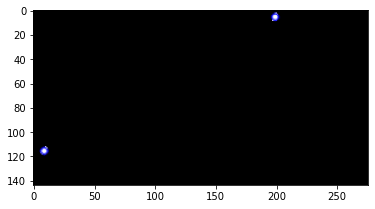

For blue
No. of circles detected: 0
No. of blobs:  10


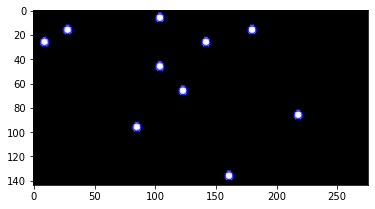

For red
No. of circles detected: 0
No. of blobs:  1


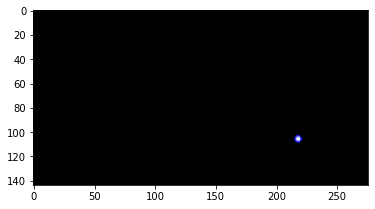

For blue
No. of circles detected: 0
No. of blobs:  7


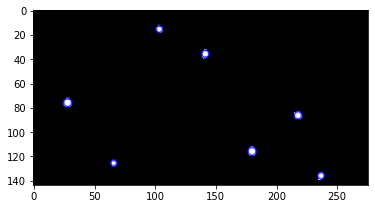

For red
No. of circles detected: 0
No. of blobs:  5


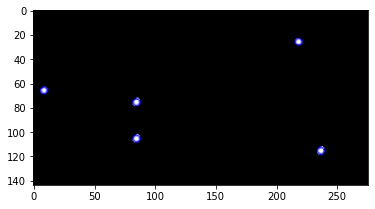

For blue
No. of circles detected: 0
No. of blobs:  10


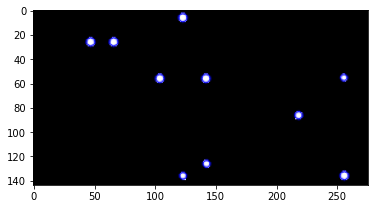

For red
No. of circles detected: 0
No. of blobs:  5


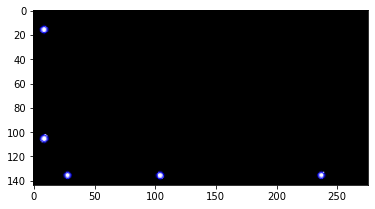

For blue
No. of circles detected: 0
No. of blobs:  3


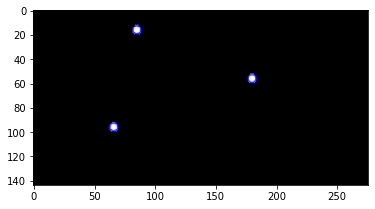

For red
No. of circles detected: 0
No. of blobs:  4


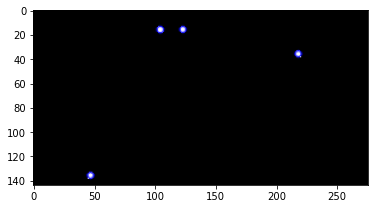

For blue
No. of circles detected: 0
No. of blobs:  5


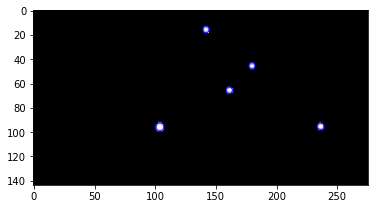

For red
No. of circles detected: 0
No. of blobs:  1


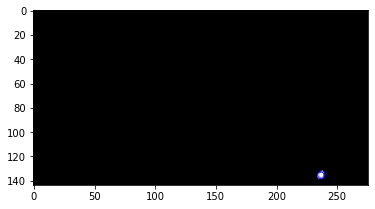

For blue
No. of circles detected: 0
No. of blobs:  4


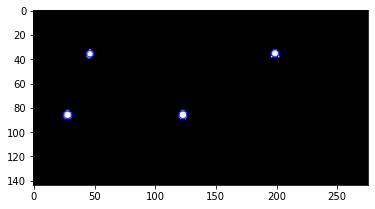

For red
No. of circles detected: 0
No. of blobs:  2


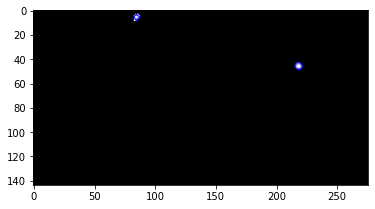

For blue
No. of circles detected: 0
No. of blobs:  5


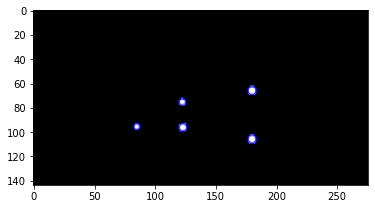

For red
No. of circles detected: 0
No. of blobs:  10


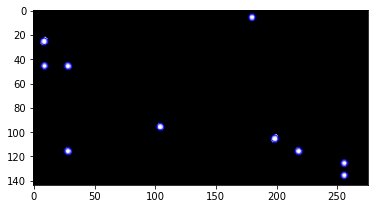

For blue
No. of circles detected: 0
No. of blobs:  3


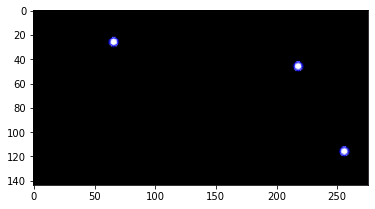

For red
No. of circles detected: 0
No. of blobs:  5


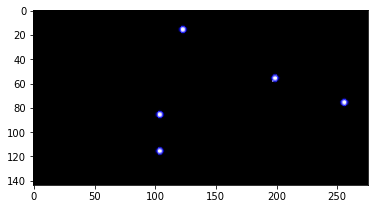

For blue
No. of circles detected: 0
No. of blobs:  4


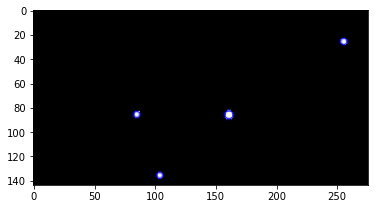

For red
No. of circles detected: 0
No. of blobs:  6


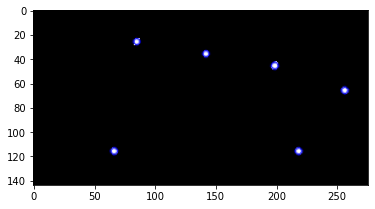

For blue
No. of circles detected: 0
No. of blobs:  3


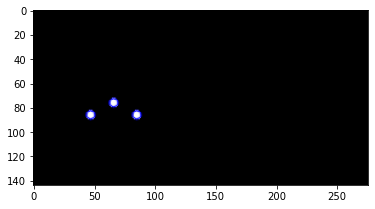

For red
No. of circles detected: 0
No. of blobs:  8


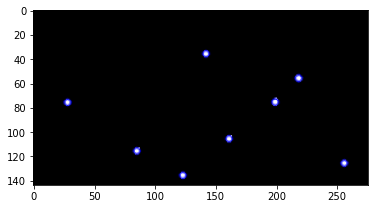

For blue
No. of circles detected: 0
No. of blobs:  2


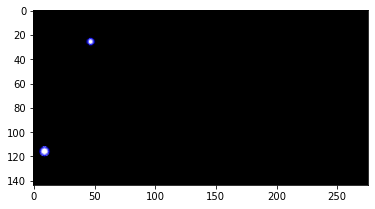

For red
No. of circles detected: 0
No. of blobs:  5


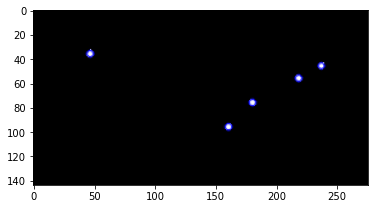

For blue
No. of circles detected: 0
No. of blobs:  7


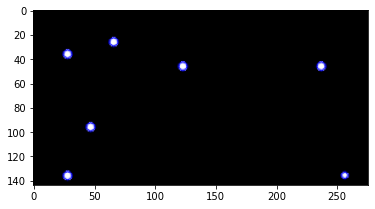

For red
No. of circles detected: 0
No. of blobs:  7


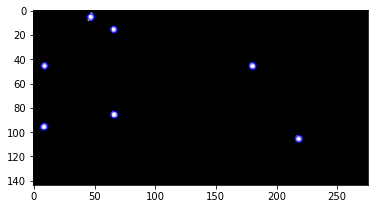

For blue
No. of circles detected: 0
No. of blobs:  10


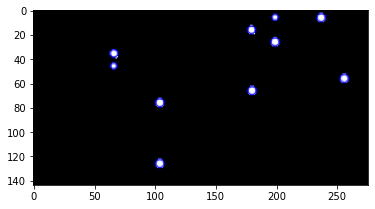

For red
No. of circles detected: 0
No. of blobs:  10


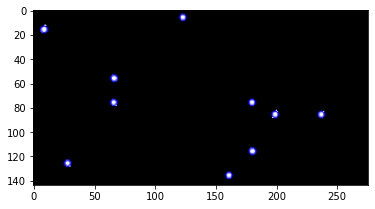

For blue
No. of circles detected: 0
No. of blobs:  4


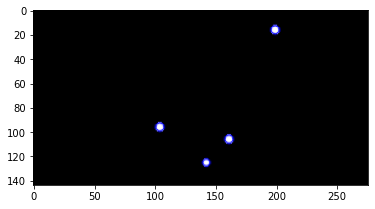

For red
No. of circles detected: 0
No. of blobs:  10


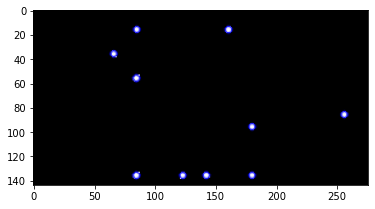

For blue
No. of circles detected: 0
No. of blobs:  8


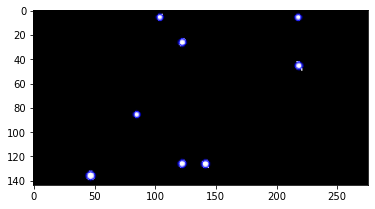

For red
No. of circles detected: 0
No. of blobs:  10


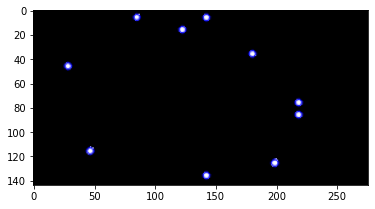

For blue
No. of circles detected: 0
No. of blobs:  1


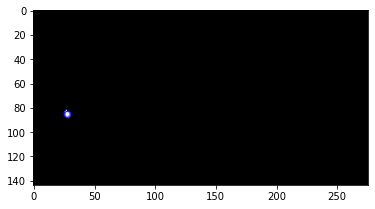

For red
No. of circles detected: 0
No. of blobs:  9


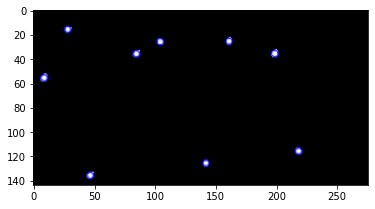

For blue
No. of circles detected: 0
No. of blobs:  6


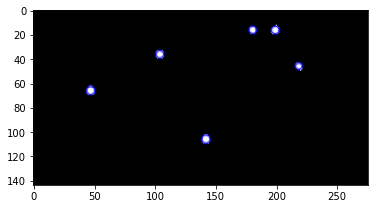

For red
No. of circles detected: 0
No. of blobs:  7


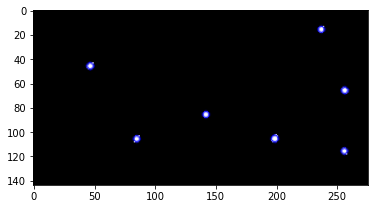

(0, 0)


In [21]:
import glob
import argparse

from operator import itemgetter
import numpy
from matplotlib import pyplot as plt
import cv2

def get_coord(img_path):
    blue = [(0,0,200),(20,20,255)] # lower and upper 
    red = [(200,0,0),(255,20,20)]
    dot_colors = [blue, red]
    col = ['blue', 'red']
    col_arr = []
    i=0

    img = cv2.imread(img_path, 1)   
    
    # # CLAHE
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    # clahe = cv2.createCLAHE(clipLimit=3,tileGridSize=(3,3))
    # img[:,:,0] = clahe.apply(img[:,:,0])
    # img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    blur = cv2.medianBlur(img, 3)
    
    # Blob
    params = cv2.SimpleBlobDetector_Params()
    params.filterByArea = True
    params.minArea = 1
    params.filterByCircularity = False
    params.filterByColor = False
    params.filterByInertia = False
    params.filterByConvexity = False
    params.minDistBetweenBlobs = 0

    detector = cv2.SimpleBlobDetector_create(params)

    for lower, upper in dot_colors:
        output = img.copy()
        index = 0

        # Threshold these colors
        mask = cv2.inRange(blur,lower,upper) 
        
        # Dilalte to increase circle
        kernel = (7,7)
        mask = cv2.dilate(mask,kernel,iterations=1)

        # Blob detection        
        kp = detector.detect(mask)
        mask = cv2.drawKeypoints(mask, kp, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        # circles = cv2.HoughCircles(mask,cv2.HOUGH_GRADIENT,1,5,param1=20,param2=8,
        #                         minRadius=0,maxRadius=25)    

        # if circles is not None:
        #     # convert the (x, y) coordinates and radius of the circles to integers
        #     circles = numpy.round(circles[0, :]).astype("int")
        #     # loop over to count
        #     for (x, y, r) in circles:
        #         cv2.circle(mask, (x, y), 7, (255, 0, 255), -1)
        #         index = index + 1
                
        print(f"For {col[i]}")
        # print(f"No. of circles detected:", index)
        print(f"No. of blobs: ", len(kp))
        i = i + 1
        col_arr.append(len(kp))
        
        # plt.imshow(mask)
        # plt.show()
    
    return col_arr

if __name__ == '__main__':
    
    input_folder = './Test Data/map'
    
    # Get list of images first
    img_list = glob.glob(f"{input_folder}/*")

    # Create dict
    full_coords = dict()
    
    # Put these results inside a dictionary
    for img in img_list:
        col_arr = get_coord(img)
        full_coords[f"{img}"] = (col_arr[0], col_arr[1])
        
        # Blue is row, Red is col
        # full_coords["row"] = col_arr[0]
        # full_coords["col"] = col_arr[1]
        
    # Sort this dictionary based on values (x,y)
    sorted_coords = sorted(full_coords.items(), key=lambda x: x[1])
    
    # print("Full coords", full_coords)
    # print("Sorted coords", sorted_coords)
    # print("Length of coord", len(sorted_coords))
    
    # rows = max(max(sorted_coords[0]))

    # print("s", sorted_coords[0])
    # print(max(sorted_coords, key=itemgetter(1))[0])
    print(max(sorted_coords, key=itemgetter(1))[1])

    # print("rows", rows)
    # print("cols", cols)




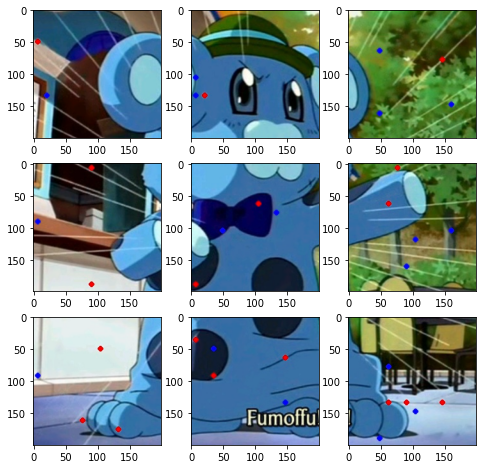

In [181]:
def plot_grid(sorted_coords):

    rows = cols = sorted_coords[-1][1][0]

    fig = plt.figure(figsize=(8, 8))

    for i in range(1, cols*rows + 1):
        img = cv2.imread(sorted_coords[i-1][0])
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)
    plt.show()